In [2]:
# ライブラリのインポート
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 少数第三位まで表示
%precision 3

from sklearn import linear_model

In [3]:
# zipを扱うためのライブラリを追加
import requests, zipfile
from io import StringIO
import io
import os

print(os.getcwd())

/Users/kouhei/Program/ML/data-scientist-training-course/src/chapter3


In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)

# zipfileの読み込み
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall('./chapter3')

In [5]:
# 3-2-2 データの読み込み
student_data_math = pd.read_csv('./chapter3/student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# データ個数や型を確認する
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [8]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [9]:
# 軸別に平均値を求る
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

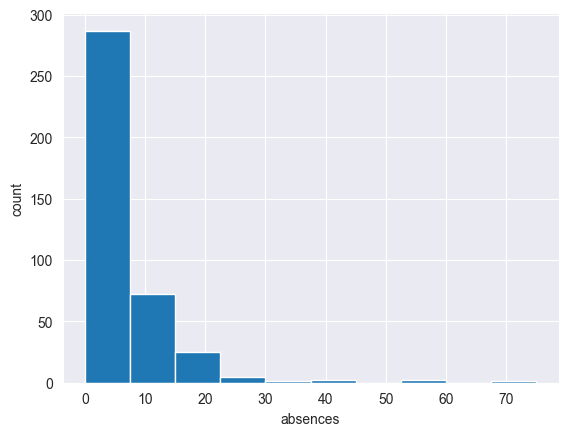

In [10]:
# 記述統計
# 3-3-1 ヒストグラム
plt.hist(student_data_math['absences'])

plt.xlabel('absences')
plt.ylabel('count')

plt.grid(True)

In [13]:
# 平均値
print('平均値', student_data_math['absences'].mean())
# 中央値
print('中央値', student_data_math['absences'].median())
# 最頻値
print('最頻値', student_data_math['absences'].mode())


平均値 5.708860759493671
中央値 4.0
最頻値 0    0
Name: absences, dtype: int64


In [15]:
# 分散と標準偏差
print('分散', student_data_math['absences'].var(ddof=0))

print('標準偏差', student_data_math['absences'].std(ddof=0))

分散 63.887389841371565
標準偏差 7.99295876640006


In [16]:
# 要約統計量とパーセンタイル

student_data_math['absences'].describe()


count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [19]:
# 四分位範囲
# student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]
student_data_math['absences'].describe().iloc[6] - student_data_math['absences'].describe().iloc[4]

8.000

In [20]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


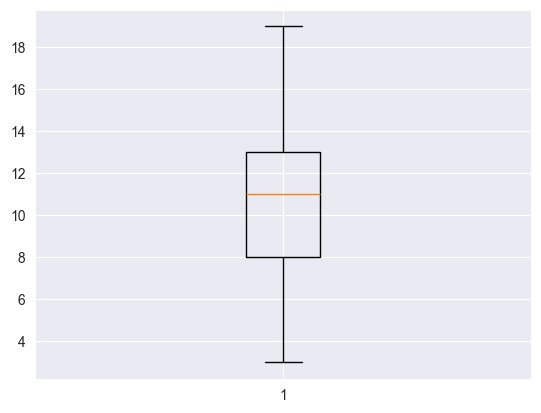

In [21]:
# 3-3-5 箱ひげ図
plt.boxplot(student_data_math['G1'])
plt.grid(True)

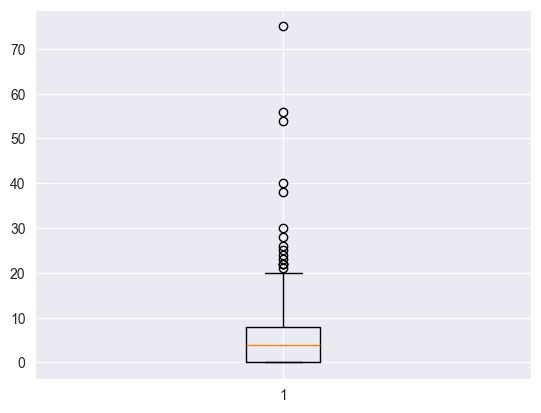

In [22]:
plt.boxplot(student_data_math['absences'])
plt.grid(True)

In [23]:
# 変動係数
student_data_math['absences'].std(ddof=0) / student_data_math['absences'].mean()

1.400

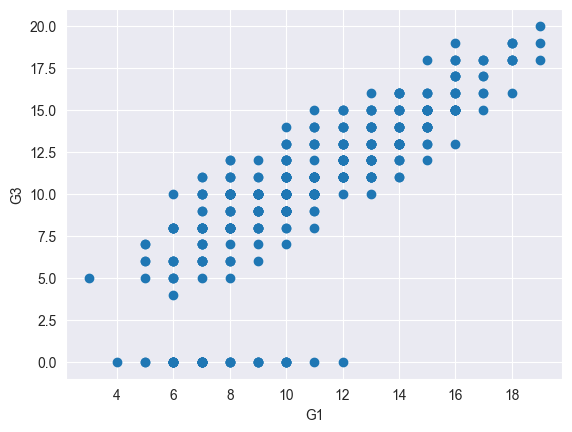

In [24]:
# 散布図と相関係数
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

plt.xlabel('G1')
plt.ylabel('G3')
plt.grid(True)


In [25]:
# 共分散
np.cov(student_data_math['G1'], student_data_math['G3'], ddof=0)

array([[10.989, 12.157],
       [12.157, 20.936]])

In [27]:
# 相関係数
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

PearsonRResult(statistic=np.float64(0.8014679320174142), pvalue=np.float64(9.001430312276764e-90))

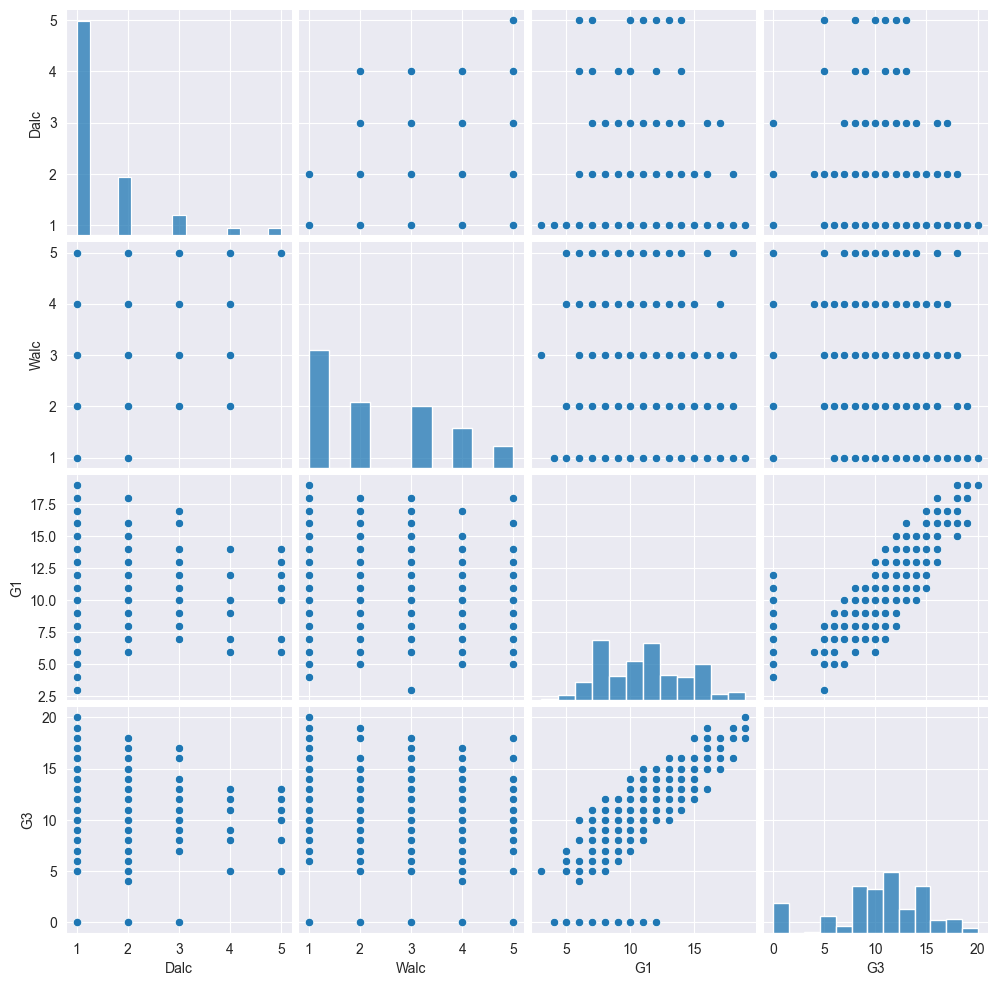

In [28]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [34]:
# Practice 3-1
student_data_por = pd.read_csv('./chapter3/student-por.csv', sep=';')
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [33]:
# 要約統計量
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [40]:
# データのマージ
student_data_merge = pd.merge(student_data_math, student_data_por, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
                                                                  'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'], suffixes=('_math', '_por'))
student_data_merge.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


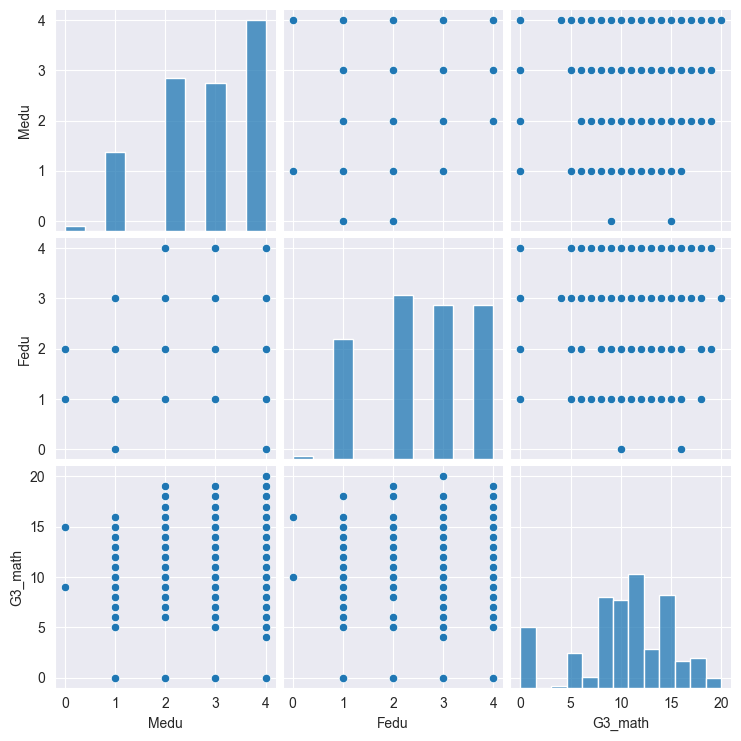

In [41]:
sns.pairplot(student_data_merge[['Medu', 'Fedu', 'G3_math']])
plt.grid(True)

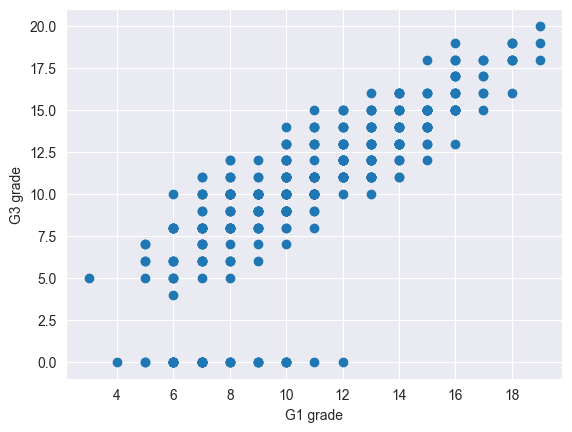

In [42]:
# 3-4 単回帰分析
# 散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [43]:
# 3-4-1 線形単回帰分析
reg = linear_model.LinearRegression()

X = student_data_math[['G1']].values
Y = student_data_math['G3'].values

reg.fit(X, Y)

print('回帰係数:', reg.coef_)
print('切片:', reg.intercept_)


回帰係数: [1.106]
切片: -1.652803828800458


In [44]:
# 決定係数
print('決定係数:', reg.score(X, Y))

決定係数: 0.64235084605227


In [47]:
# Practice 3-4 
P_X = student_data_por[['G1']].values
P_Y = student_data_por['G3'].values
P_reg = linear_model.LinearRegression()
P_reg.fit(P_X, P_Y)
print('回帰係数:', P_reg.coef_)
print('切片:', P_reg.intercept_)
print('決定係数:', P_reg.score(P_X, P_Y))

回帰係数: [0.973]
切片: 0.8203984121064511
決定係数: 0.6829156800171083


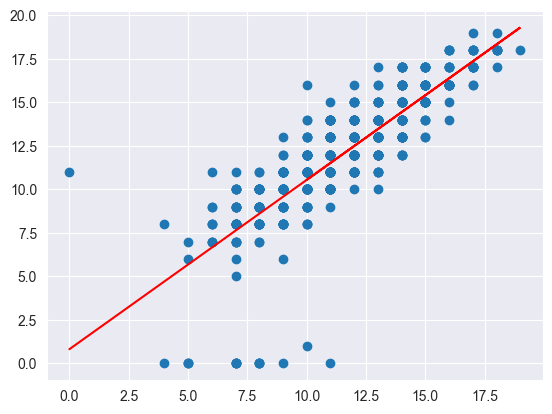

In [50]:
# Practice 3-5
# 散布図
plt.plot(student_data_por['G1'], student_data_por['G3'], 'o')

# 回帰直線の描画
plt.plot(student_data_por['G1'], P_reg.predict(P_X), color='red')

In [58]:
# Practice 3-6
P1_X = student_data_por.loc[:, 'absences'].values
P1_Y = student_data_por['G3'].values
P1_reg = linear_model.LinearRegression()
P1_reg.fit(P1_X.reshape(-1, 1), P1_Y)
print('回帰係数:', P1_reg.coef_)
print('切片:', P1_reg.intercept_)
print('決定係数:', P1_reg.score(P1_X.reshape(-1 , 1) , P1_Y))

回帰係数: [-0.064]
切片: 12.138800862687443
決定係数: 0.008350131955637385


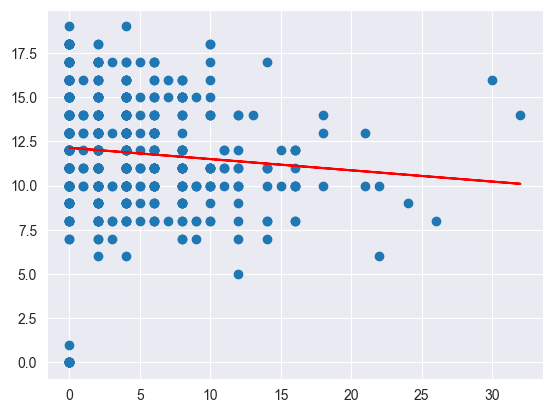

In [59]:
# 散布図
plt.plot(student_data_por['absences'], student_data_por['G3'], 'o')

# 回帰直線の描画
plt.plot(student_data_por['absences'], P1_reg.predict(P1_X.reshape(-1, 1)), color='red')

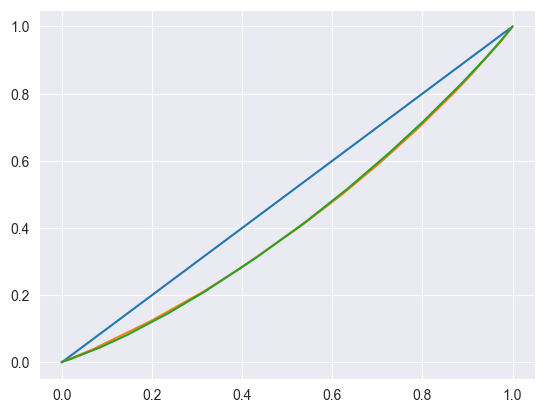

In [62]:
# 総合問題2
# 男女別に昇順に並び替える
student_data_math_F = student_data_math[student_data_math.sex=='F'].sort_values(by='G1')
student_data_math_M = student_data_math[student_data_math.sex=='M'].sort_values(by='G1')

len_F = np.arange(len(student_data_math_F))
len_M = np.arange(len(student_data_math_M))

# ローレンツ曲線
plt.plot(len_F / len_F.max(), len_F/len_F.max(), label='E')
plt.plot(len_F / len_F.max(), student_data_math_F['G1'].cumsum() / student_data_math_F['G1'].sum(), label='F')
plt.plot(len_M / len_M.max(), student_data_math_M['G1'].cumsum() / student_data_math_M['G1'].sum(), label='M')
